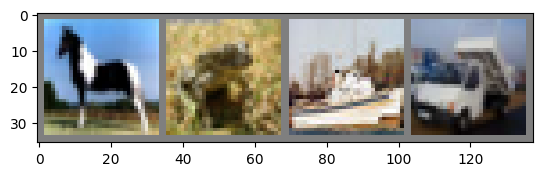

horse frog  ship  truck


LitNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [2]:
from model_lightning import *
from utils import imshow

net

In [6]:
from data import trainloader, testloader, classes

trainer = L.Trainer(accelerator='cpu', max_epochs=2)
trainer.fit(model=net, train_dataloaders=trainloader, val_dataloaders=testloader)

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


/Users/marcos/code/image_classifier/.venv/lib/python3.11/site-packages/lightning/pytorch/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(

  | Name  | Type      | Params
------------------------------------
0 | conv1 | Conv2d    | 456   
1 | pool  | MaxPool2d | 0     
2 | conv2 | Conv2d    | 2.4 K 
3 | fc1   | Linear    | 48.1 K
4 | fc2   | Linear    | 10.2 K
5 | fc3   | Linear    | 850   
------------------------------------
62.0 K    Trainable params
0         Non-trainable params
62.0 K    Total params
0.248     Total estimated model params size (MB)


Epoch 1: 100%|██████████| 12500/12500 [03:01<00:00, 68.90it/s, v_num=7]     

`Trainer.fit` stopped: `max_epochs=2` reached.


Epoch 1: 100%|██████████| 12500/12500 [03:01<00:00, 68.90it/s, v_num=7]


In [7]:
PATH = './cifar_net_lightning.pth'
torch.save(net.state_dict(), PATH)

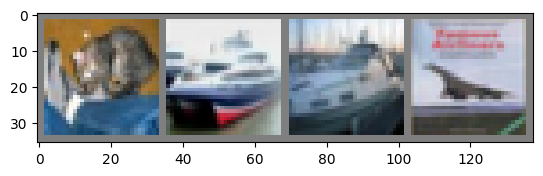

GroundTruth:  cat   ship  ship  plane


In [8]:
import torchvision

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [11]:
net = LitNet()
net.load_state_dict(torch.load(PATH))
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  frog  car   car   plane


In [12]:
from model import test

test(net)

Accuracy of the network on the 10000 test images: 56 %
Accuracy for class: plane is 70.1 %
Accuracy for class: car   is 76.9 %
Accuracy for class: bird  is 33.5 %
Accuracy for class: cat   is 26.1 %
Accuracy for class: deer  is 67.9 %
Accuracy for class: dog   is 35.9 %
Accuracy for class: frog  is 78.0 %
Accuracy for class: horse is 53.5 %
Accuracy for class: ship  is 70.6 %
Accuracy for class: truck is 57.2 %
